**온도 말고 다른 변수도 넣어보자.**

In [0]:
from datetime import time, datetime

now = datetime.now()
now =now.strftime('%m%d_%H%M')


In [63]:
#!pip install tensorflow==2.0.0
!pip install tensorflow-gpu==2.0.0

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)
print(tf.test.is_gpu_available())

2.0.0
True


In [0]:
tf.debugging.set_log_device_placement(True)

In [0]:
tf.random.set_seed(1234)


# 0 한글 폰트

In [5]:
!wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip"
!unzip "NotoSansCJKkr-hinted.zip"

--2020-03-11 07:47:11--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 108.177.127.128, 2a00:1450:4013:c07::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121163981 (116M) [application/zip]
Saving to: ‘NotoSansCJKkr-hinted.zip’

NotoSansCJKkr-hinte 100%[===================>] 115.55M  43.4MB/s    in 2.7s    

2020-03-11 07:47:14 (43.4 MB/s) - ‘NotoSansCJKkr-hinted.zip’ saved [121163981/121163981]

Archive:  NotoSansCJKkr-hinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKkr-Black.otf  
  inflating: NotoSansCJKkr-Bold.otf  
  inflating: NotoSansCJKkr-DemiLight.otf  
  inflating: NotoSansCJKkr-Light.otf  
  inflating: NotoSansCJKkr-Medium.otf  
  inflating: NotoSansCJKkr-Regular.otf  
  inflating: NotoSansCJKkr-T

In [0]:
!mv NotoSansCJKkr-Medium.otf /usr/share/fonts/truetype/

In [0]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
font_list = fm.createFontList(font_files)
fm.fontManager.ttflist.extend(font_list)
plt.rcParams['font.family'] = "Noto Sans CJK KR"

# 1. 데이터 읽기 

Contents of the Notebook:
Part1: Exploratory Data Analysis(EDA):

1)Analysis of the features.

2)Finding any relations or trends considering multiple features.
Part2: Feature Engineering and Data Cleaning:

1)Adding any few features.

2)Removing redundant features.

3)Converting features into suitable form for modeling.
Part3: Predictive Modeling

1)Running Basic Algorithms.

2)Cross Validation.

3)Ensembling.

4)Important Features Extraction

# 1. 데이터 불러오기

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [9]:
import os
from pathlib import Path

folder = "Colab Notebooks/dacon"
project_dir = "temperature_forecasting"

base_path = Path("/content/drive/My Drive/")
project_path = base_path / folder / project_dir
os.chdir(project_path)
# for x in list(project_path.glob("*")):
#     if x.is_dir():
#         dir_name = str(x.relative_to(project_path))
#         os.rename(dir_name, dir_name.split(" ", 1)[0])
print(f"현재 디렉토리 위치: {os.getcwd()}")

현재 디렉토리 위치: /content/drive/My Drive/Colab Notebooks/dacon/temperature_forecasting


In [10]:
df = pd.read_csv('./data/'+'train.csv')
df.shape

(4752, 60)

* 4320개(30일)
* 432개(3일) 

|-|30일(train)|3일(train)|80일(test)|
|---|---|---|---|
|Y18|NULL|432개|NULL|
|Y00-Y17|4320개|NULL|NULL|
|X00-X17|4320개|432개|11520개|

In [0]:
n = 4320

In [12]:
df_test = pd.read_csv('./data/test.csv')
df_test.shape

(11520, 41)

## x

* feat_temp: 기온 
* feat_air_press: 현지기압
* feat_wind_speed: 풍속
* feat_rainfall: 일일 누적강수량 
* feat_sea_press: 해면기압
* feat_insol: 일일 누적일사량
* feat_humid: 습도
* feat_dir_wind: 풍향



In [0]:
#feat_x = [feat_temp, feat_air_press, feat_wind_speed, feat_rainfall, feat_sea_press, feat_insol, feat_humid, feat_dir_wind]
feat_x = ['X00', 'X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09', 
          'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 
          'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 
          'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39']
feat_temp = ['X00', 'X07', 'X28', 'X31', 'X32']
feat_air_press = ['X01', 'X06', 'X22', 'X27', 'X29']
feat_wind_speed = ['X02', 'X03', 'X18', 'X24', 'X26']
feat_rainfall = ['X04', 'X10', 'X21', 'X36', 'X39']
feat_sea_press = ['X05', 'X08', 'X09', 'X23', 'X33']
feat_insol = ['X11', 'X14', 'X16', 'X19', 'X34']
feat_humid = ['X12', 'X20', 'X30', 'X37', 'X38']
feat_dir_wind = ['X13', 'X15', 'X17', 'X25', 'X35']

In [14]:
df[feat_x].head(3)

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0
1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0
2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.0,86.1,232.0,0.0,144.0,0.0,0.0,0.6,0.0,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.0,235.2,0.0,77.3,63.9,0.0


In [15]:
df[feat_x].tail(3)

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
4749,19.7,987.7,0.9,0.6,0.0,1006.9,987.6,21.4,1007.4,1007.5,2.5,23.88,95.9,127.8,0.0,256.1,0.0,299.1,0.6,0.0,90.8,10.5,1000.4,1007.6,0.0,0.0,0.2,1006.0,23.6,999.5,90.2,17.8,19.2,1007.5,22.16,254.2,0.0,83.0,58.9,0.5
4750,19.4,987.7,0.9,0.8,0.0,1006.9,987.8,21.3,1007.6,1007.5,2.5,23.88,95.9,323.8,0.0,255.1,0.0,0.0,0.6,0.0,91.5,10.5,1000.4,1007.6,0.0,0.0,0.1,1006.0,23.3,999.5,90.1,17.7,19.3,1007.6,22.16,300.0,0.0,83.2,59.8,0.5
4751,19.1,987.6,1.0,0.3,0.0,1006.8,987.8,21.2,1007.5,1007.4,2.5,23.88,96.2,0.0,0.0,237.2,0.0,17.7,0.0,0.0,93.0,10.5,1000.3,1007.6,0.0,0.0,0.1,1006.1,23.2,999.5,89.6,17.7,19.5,1007.7,22.16,157.5,0.0,84.0,59.5,0.5


In [113]:
df_test.describe()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
count,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.0,11520.000000,11520.0,11520.000000,11520.000000,11520.0,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000
mean,10511.500000,25.145625,987.616693,1.401033,1.479436,2.396016,1006.869314,987.839045,26.032352,1007.321424,1006.938741,2.709115,8.311291,79.575564,114.648646,0.0,125.218993,0.0,136.219931,1.354696,0.0,80.689931,2.847092,1000.417891,1007.368984,1.137622,147.054679,1.349800,1005.802595,26.468750,999.435260,76.208698,24.544392,24.519905,1007.319826,8.480451,172.389991,2.266267,79.336875,71.271146,2.332856
std,3325.681885,3.824374,4.624002,1.376209,1.087042,6.382526,4.757237,4.637961,3.513596,4.788943,4.777357,8.494738,8.678047,16.028721,105.976126,0.0,107.245099,0.0,109.632121,1.251191,0.0,17.504181,8.507719,4.712652,4.743564,1.060000,109.343527,1.277034,4.765731,3.527912,4.690173,15.845644,4.040956,4.021288,4.778875,8.997879,109.130854,8.564625,14.861512,15.016123,6.591677
min,4752.000000,15.500000,970.300000,0.000000,0.000000,0.000000,990.000000,971.300000,17.300000,990.500000,989.200000,0.000000,0.000000,29.100000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,30.000000,0.000000,983.700000,990.500000,0.000000,0.000000,0.000000,989.400000,18.700000,982.700000,25.800000,14.200000,15.100000,990.900000,0.000000,0.000000,0.000000,27.500000,22.800000,0.000000
25%,7631.750000,22.300000,985.300000,0.400000,0.700000,0.000000,1004.400000,985.500000,23.300000,1004.900000,1004.500000,0.000000,0.050000,67.300000,21.075000,0.0,23.900000,0.0,29.075000,0.400000,0.0,67.300000,0.000000,998.000000,1004.900000,0.300000,43.300000,0.300000,1003.300000,23.700000,997.100000,64.400000,21.500000,21.400000,1004.800000,0.000000,73.100000,0.000000,68.600000,60.700000,0.000000
50%,10511.500000,25.300000,987.900000,1.100000,1.300000,0.000000,1007.200000,988.100000,26.100000,1007.700000,1007.300000,0.000000,5.800000,83.300000,71.700000,0.0,119.400000,0.0,128.000000,1.000000,0.0,86.400000,0.000000,1000.700000,1007.700000,0.900000,140.400000,1.100000,1006.100000,26.500000,999.700000,79.800000,24.500000,24.500000,1007.600000,5.715000,178.800000,0.000000,82.100000,72.000000,0.000000
75%,13391.250000,27.600000,990.700000,2.000000,2.000000,0.700000,1010.000000,991.000000,28.300000,1010.500000,1010.100000,0.500000,15.680000,94.000000,204.925000,0.0,219.300000,0.0,224.100000,2.100000,0.0,97.100000,1.000000,1003.500000,1010.500000,1.700000,254.800000,2.000000,1008.900000,28.800000,1002.500000,90.200000,27.200000,27.300000,1010.400000,15.860000,261.400000,0.100000,92.725000,84.300000,0.500000
max,16271.000000,36.300000,998.100000,11.000000,10.900000,46.500000,1018.000000,998.500000,36.000000,1018.500000,1017.900000,57.000000,31.250000,98.700000,359.900000,0.0,359.900000,0.0,360.000000,10.300000,0.0,97.900000,64.500000,1011.400000,1018.500000,9.900000,359.900000,11.900000,1016.900000,36.500000,1010.300000,97.200000,35.300000,35.800000,1018.400000,31.640000,359.900000,97.700000,96.800000,95.900000,79.500000


## y

### feat_y

In [0]:
feat_y = ['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17']

In [18]:
df[feat_y].shape

(4752, 18)

Y00 -Y17의 null 값이 없는 부분만 추출 

In [19]:
df_y = df[feat_y][:n]
df_y.shape 

(4320, 18)

### y 그룹화

6개의 그룹으로 나눠보기로 한다. 

'Y03', 'Y04'  
'Y00'  
'Y05', 'Y08', 'Y14'  
'Y13','Y01', 'Y02'  
'Y09', 'Y10', 'Y11', 'Y17', 'Y15',  Y16'  
'Y12', 'Y06', 'Y07'



In [0]:
df_y_g1 = df_y[['Y03', 'Y04']]
df_y_g2 = df_y[['Y00']]
df_y_g3 = df_y[['Y05', 'Y08', 'Y14']]
df_y_g4 = df_y[['Y13','Y01', 'Y02']]
df_y_g5 = df_y[['Y09', 'Y10', 'Y11', 'Y17', 'Y15', 'Y16']]
df_y_g6 = df_y[['Y12', 'Y06', 'Y07']]

# model

간단한 모델을 구성해보자  


1.   X 중 기온 데이터인 feat_temp만 사용해서 Y00~17의 온도를 추정하는 모델 만들기 
2.   1번에서 만든 모델로 Y00 ~ Y17의 비어있는 3일간의 데이터를 예측  
3.   2번에서 추정한 Y00 ~ Y17의 온도, Y18을 이용해서 Y00~17로 Y18을 추정하는 모델 만들기
4.   test data에 대해 1번에서 만든 모델로 Y00 ~ Y17을 예측. 예측한 Y00 ~ Y17과 3번에서 만든 모델로 Y18 온도를 예측  



## 1.
df_y_g4에 대해 모델링 해보기 (X 5군데와 전체적으로 유사해서 선택함) 

데이터셋  
* X_feat_temp 와 Y00-Y17, 모두 존재하는 rows는 4320 개.  
* 해당 시점에 Y00-Y17 지역의 온도를 추정할 것이므로 시리즈 데이터로 보지 않음.
* 모든 features를 사용하지는 않고 feat_temp만 사용.
* 모든 지역을 맞추기보다 그룹화 된 지역의 평균 온도를 타겟으로 함.   
* 즉, feat_temp = ['X00', 'X07', 'X28', 'X31', 'X32']를 features로 보고, mean(['Y13','Y01', 'Y02'])을 target으로 하는 모델을 구성할 것.
* train 90%, test 10%


### dataset 

#### Split the data into train and test

In [0]:
## 
frac = 0.9 # train data 비율 

In [0]:
## y_col : y_col인 컬럼들의 평균을 타겟 값으로 할 것.
y_col = ['Y15', 'Y16'] ##list(df_y_g3.columns)
x_col = feat_temp + feat_rainfall + feat_wind_speed

In [0]:
dataset = df[x_col+y_col][:n]
dataset['Y']= df[y_col].mean(axis=1)
dataset = dataset.drop(y_col, axis=1)

test_80_dataset = df_test[x_col]

test_3_dataset = df[x_col][n:n+n//10]

In [0]:
train_dataset = dataset.sample(frac=frac,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [144]:
train_dataset.shape, test_dataset.shape, test_80_dataset.shape

((3888, 16), (432, 16), (11520, 15))

#### Split features from labels

In [0]:
train_labels = train_dataset.pop('Y')
test_labels = test_dataset.pop('Y')

In [146]:
train_dataset.shape, test_dataset.shape

((3888, 15), (432, 15))

In [147]:
train_labels.shape, test_labels.shape

((3888,), (432,))

In [148]:
len(train_dataset.keys())

15

## Normalize the data

In [149]:
train_stats = train_dataset.describe().transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
X00,3888.0,19.994316,4.732284,8.3,16.575,19.60,23.8,30.9
X07,3888.0,21.461060,4.410875,11.6,18.100,21.00,24.7,32.7
X28,3888.0,21.922917,4.261941,10.3,18.700,21.70,25.0,33.2
X31,3888.0,19.636806,5.599947,5.3,15.775,19.15,24.0,33.1
X32,3888.0,19.772582,5.335866,5.5,16.100,19.25,23.9,32.9
X04,3888.0,1.386034,4.623522,0.0,0.000,0.00,0.0,25.6
X10,3888.0,1.073431,3.434502,0.0,0.000,0.00,0.0,18.5
X21,3888.0,1.180427,4.203475,0.0,0.000,0.00,0.0,21.0
X36,3888.0,1.675540,5.834230,0.0,0.000,0.00,0.0,33.6
X39,3888.0,1.157536,4.754191,0.0,0.000,0.00,0.0,28.0


In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_test_80 = norm(test_80_dataset)
normed_test_3 = norm(test_3_dataset )

In [151]:
normed_train_data.describe()

,X00,X07,X28,X31,X32,X04,X10,X21,X36,X39,X02,X03,X18,X24,X26
count,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03
mean,-2.585116e-15,6.492877e-15,2.111106e-14,1.162293e-14,-5.609635e-15,-1.128812e-15,1.664192e-15,7.961167e-16,-1.431068e-15,8.619791e-16,1.362936e-15,-1.954762e-15,6.958740e-16,1.175043e-15,2.912394e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.471178e+00,-2.235624e+00,-2.727141e+00,-2.560168e+00,-2.674839e+00,-2.997788e-01,-3.125435e-01,-2.808217e-01,-2.871913e-01,-2.434770e-01,-1.410670e+00,-1.513894e+00,-1.185537e+00,-8.940494e-01,-1.084916e+00
25%,-7.225508e-01,-7.619939e-01,-7.562086e-01,-6.896147e-01,-6.882824e-01,-2.997788e-01,-3.125435e-01,-2.808217e-01,-2.871913e-01,-2.434770e-01,-6.794520e-01,-6.843514e-01,-7.597608e-01,-8.940494e-01,-8.466697e-01
50%,-8.332463e-02,-1.045279e-01,-5.230402e-02,-8.693039e-02,-9.793768e-02,-2.997788e-01,-3.125435e-01,-2.808217e-01,-2.871913e-01,-2.434770e-01,-2.224405e-01,-1.658872e-01,-3.339846e-01,-2.588369e-01,-2.113457e-01
75%,8.041960e-01,7.343079e-01,7.219910e-01,7.791493e-01,7.735235e-01,-2.997788e-01,-3.125435e-01,-2.808217e-01,-2.871913e-01,-2.434770e-01,6.001802e-01,5.599626e-01,6.027230e-01,6.486094e-01,6.622247e-01
max,2.304528e+00,2.548007e+00,2.645997e+00,2.404165e+00,2.460223e+00,5.237126e+00,5.073973e+00,4.715045e+00,5.471924e+00,5.646064e+00,7.912364e+00,4.500290e+00,6.393279e+00,4.550629e+00,4.315337e+00


In [152]:
normed_test_data.describe()

,X00,X07,X28,X31,X32,X04,X10,X21,X36,X39,X02,X03,X18,X24,X26
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,-0.060677,-0.054515,-0.057138,-0.058946,-0.041671,0.024249,0.055454,0.030869,0.019984,0.058401,0.014105,-0.096999,-0.068072,-0.049620,-0.035602
std,1.026405,1.027347,1.032128,1.022256,1.017789,1.008342,1.099444,1.043850,0.991610,1.150688,0.955381,0.900826,0.900138,0.975899,1.027125
min,-2.428915,-2.212953,-2.609824,-2.524454,-2.599875,-0.299779,-0.312543,-0.280822,-0.287191,-0.243477,-1.410670,-1.513894,-1.185537,-0.894049,-1.084916
25%,-0.759531,-0.784665,-0.779672,-0.774437,-0.781988,-0.299779,-0.312543,-0.280822,-0.287191,-0.243477,-0.679452,-0.788044,-0.759761,-0.894049,-0.846670
50%,-0.188982,-0.240555,-0.216548,-0.203003,-0.163532,-0.299779,-0.312543,-0.280822,-0.287191,-0.243477,-0.131038,-0.062194,-0.333985,-0.349582,-0.290761
75%,0.698539,0.643623,0.675064,0.689863,0.754782,-0.299779,-0.312543,-0.280822,-0.287191,-0.243477,0.600180,0.456270,0.517568,0.557865,0.503394
max,2.283397,2.502665,2.552143,2.297021,2.347776,5.237126,5.073973,4.715045,5.471924,5.646064,4.804686,3.152284,3.583156,3.461693,3.362351


In [153]:
normed_test_80.describe()

,X00,X07,X28,X31,X32,X04,X10,X21,X36,X39,X02,X03,X18,X24,X26
count,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000
mean,1.088546,1.036369,1.066611,0.876363,0.889700,0.218444,0.476251,0.396497,0.101252,0.247218,-0.130094,0.020175,-0.031942,0.138281,-0.012966
std,0.808145,0.796576,0.827771,0.721606,0.753634,1.380447,2.473354,2.023973,1.467996,1.386498,1.257887,1.127184,1.065454,0.961893,1.014163
min,-0.949714,-0.943364,-0.756209,-0.970867,-0.875693,-0.299779,-0.312543,-0.280822,-0.287191,-0.243477,-1.410670,-1.513894,-1.185537,-0.894049,-1.084916
25%,0.487224,0.416911,0.416966,0.332716,0.304996,-0.299779,-0.312543,-0.280822,-0.287191,-0.243477,-1.045061,-0.788044,-0.844916,-0.621815,-0.846670
50%,1.121168,1.051705,1.073943,0.868436,0.885970,-0.299779,-0.312543,-0.280822,-0.287191,-0.243477,-0.405245,-0.165887,-0.333985,-0.077348,-0.211346
75%,1.607191,1.550472,1.613603,1.350583,1.410721,-0.148379,-0.166962,-0.042923,-0.270051,-0.138307,0.417376,0.559963,0.602723,0.648609,0.503394
max,3.445626,3.296158,3.420292,2.797026,3.003715,9.757489,16.283750,15.063626,16.458807,16.478611,8.643583,9.788625,7.585452,8.089670,8.365528


## model

#### Build the model

In [0]:
def build_model():
    model = keras.Sequential([
            layers.Dense(16, activation='selu', kernel_initializer='lecun_normal', input_shape=[len(normed_train_data.keys())]),
            layers.Dense(5, activation='selu', kernel_initializer='lecun_normal'),
            layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [198]:
model = build_model()

Executing op TruncatedNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TruncatedNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0


#### Inspect the model

In [199]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 16)                256       
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 85        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 6         
Total params: 347
Trainable params: 347
Non-trainable params: 0
_________________________________________________________________


In [200]:
example_batch = normed_train_data[:5]
example_result = model.predict(example_batch)
example_result

Executing op __inference_keras_scratch_graph_1985554 in device /job:localhost/replica:0/task:0/device:GPU:0


array([[ 1.2363994 ],
       [ 0.8055856 ],
       [-1.8342468 ],
       [ 0.9663092 ],
       [ 0.59164953]], dtype=float32)

#### Train the model

In [0]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [202]:
EPOCHS = 600

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.9, verbose=0,
  callbacks=[PrintDot()])

Executing op __inference_keras_scratch_graph_1986119 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_keras_scratch_graph_1986288 in device /job:localhost/replica:0/task:0/device:GPU:0

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [203]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist[::100]

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,564.384661,22.832447,564.384644,527.135363,22.068571,527.135376,0
100,6.205062,1.931748,6.205062,7.002457,2.054201,7.002456,100
200,4.393132,1.680083,4.393132,5.518221,1.871245,5.518223,200
300,3.750408,1.543677,3.750408,5.103476,1.786724,5.103476,300
400,3.349461,1.436854,3.349461,4.876770,1.731364,4.876770,400
500,3.206291,1.398688,3.206291,4.885908,1.727079,4.885909,500


In [0]:
def plot_history(history, ylim_mae=False, ylim_mse=False):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(20,6))

    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Y]]')
    plt.plot(hist['epoch'], hist['mae'],
            label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
            label = 'Val Error')
    if ylim_mae: 
        plt.ylim(ylim_mae)
    else:
        plt.ylim([0,5])
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$Y^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    if ylim_mse: 
        plt.ylim(ylim_mse)
    else:
        plt.ylim([0,20])
    plt.legend()
    plt.show()

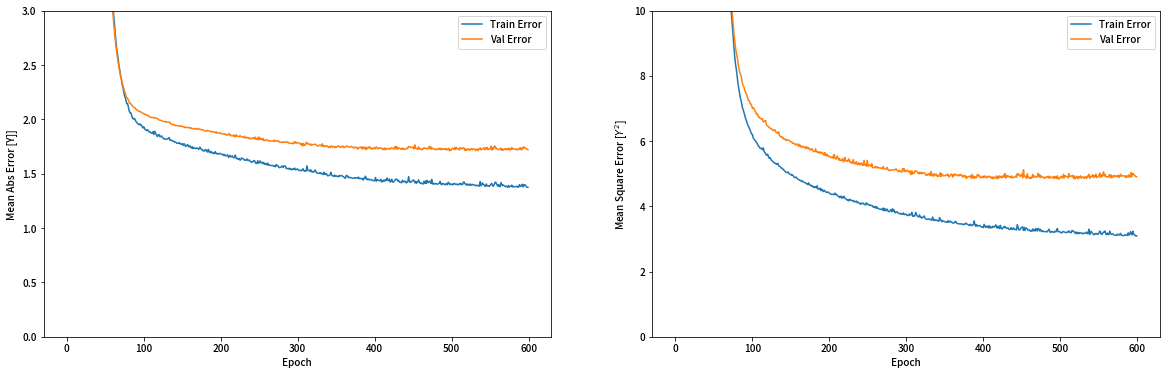

In [205]:
plot_history(history, [0, 3], [0, 10])

### Make predictions

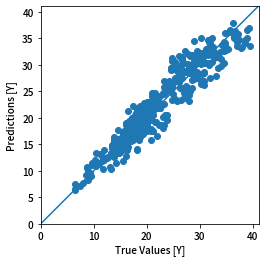

In [206]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Y]')
plt.ylabel('Predictions [Y]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


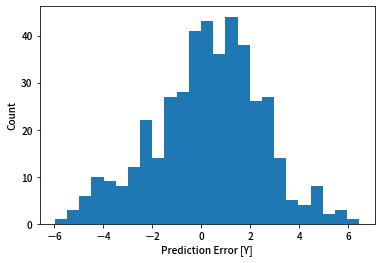

In [207]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Y]")
_ = plt.ylabel("Count")

#### 3일 예측해서 Y18과 비교해보기

In [213]:
test = df[x_col][n:n+n//10]
test_predictions = model.predict(normed_test_3).flatten()

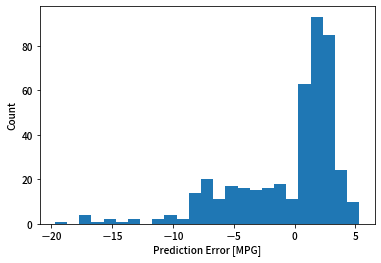

In [214]:
error = test_predictions-df['Y18'][n:n+n//10]
error.mean()
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [215]:
error[abs(error)>7]

4532    -7.084236
4536    -8.413563
4674    -7.691120
4676    -8.572832
4677   -10.155479
4678    -9.748047
4679   -10.983101
4681    -7.311405
4682    -7.002724
4683    -7.906845
4685    -7.568857
4705    -7.362047
4707    -8.071344
4708    -7.711962
4709    -7.861578
4710    -7.286625
4712    -8.372665
4713    -9.382679
4714   -10.093298
4715    -7.480255
4717    -8.469172
4718    -8.238550
4721    -7.137796
4722    -8.020777
4723    -8.429039
4724    -8.586658
4725    -7.575493
4726    -7.494179
4727    -7.407587
4730    -7.591885
4731    -7.145456
4733   -11.497774
4734   -17.032806
4735   -19.717232
4736   -13.583115
4737   -16.776408
4738   -17.326066
4739   -15.214891
4740   -17.153659
4741   -15.652298
4742   -13.396365
4743   -15.902556
4744   -14.035460
4745   -10.555066
4746    -9.149543
4747    -8.415629
4748    -7.877345
Name: Y18, dtype: float64

#### 80일 예측 

In [218]:
test_predictions = model.predict(normed_test_80)

In [0]:
# 제출 파일 만들기
submit = pd.DataFrame({'id':range(144*33, 144*113),
              'Y18':test_predictions.reshape(1,-1)[0]})

In [0]:
submit.to_csv('./results/baseline_result'+now+'.csv', index = False)

## model2

#### Build the model

In [0]:
def build_model2():
    model = keras.Sequential([
            layers.Dense(1, activation='linear', input_shape=[1]),
            #layers.Dense(2, activation='relu'),
            #layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.005)
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [221]:
model2 = build_model2()

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0


#### Inspect the model

In [83]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [222]:
example_batch = test_predictions[:10]
example_result = model2.predict(example_batch)
example_result

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_distributed_function_2368869 in device /job:localhost/replica:0/task:0/device:GPU:0


array([[-18.329855],
       [-18.924189],
       [-18.840452],
       [-18.378843],
       [-18.47248 ],
       [-18.24247 ],
       [-18.682526],
       [-18.365538],
       [-18.55345 ],
       [-17.922136]], dtype=float32)

#### Train the model

In [223]:
EPOCHS = 40
## model1를 이용해 Yi를 예측한 결과를 train data로 이용
## Y18을 test data로 함
tmp_features =  model.predict(df[x_col][n:n+n//10])
tmp_labels = np.array(df['Y18'][n:n+n//10])

history = model2.fit(
  tmp_features, tmp_labels,
  epochs=EPOCHS, validation_split = 0.1, verbose=0,
  callbacks=[PrintDot()])

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandle

In [225]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist[::5]

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,8482.199662,90.162666,8482.200195,1691.309982,35.427006,1691.310059,0
5,4643.417969,66.660912,4643.417480,1177.943147,31.229469,1177.943237,5
10,2114.554010,44.889393,2114.553955,803.041163,27.208801,803.041199,10
15,612.957045,23.927532,612.957031,549.229867,23.321611,549.229858,15
20,44.018267,5.341160,44.018261,416.570263,19.984913,416.570282,20
25,13.343973,2.789598,13.343971,400.105968,19.338020,400.105957,25
30,13.482336,2.808295,13.482336,401.925754,19.403662,401.925781,30
35,13.458938,2.747085,13.458938,397.131065,19.186634,397.131042,35


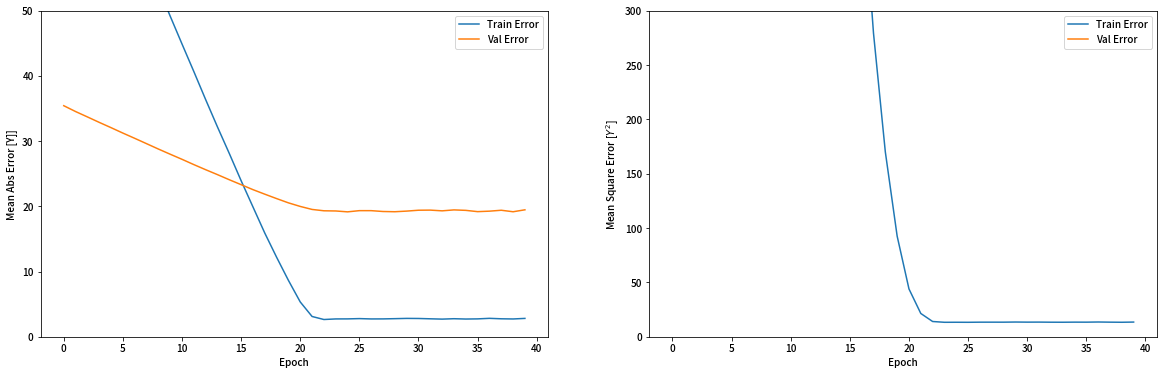

In [230]:
plot_history(history, ylim_mae=(0, 50), ylim_mse=(0, 300))

### Make predictions

#### 80일 예측 

# model- 복잡 

간단한 모델을 구성해보자  


1.   X 중 기온 데이터인 feat_temp만 사용해서 Y00~17의 온도를 추정하는 모델 만들기 
2.   1번에서 만든 모델로 Y00 ~ Y17의 비어있는 3일간의 데이터를 예측  
3.   2번에서 추정한 Y00 ~ Y17의 온도, Y18을 이용해서 Y00~17로 Y18을 추정하는 모델 만들기
4.   test data에 대해 1번에서 만든 모델로 Y00 ~ Y17을 예측. 예측한 Y00 ~ Y17과 3번에서 만든 모델로 Y18 온도를 예측  



## 1.
df_y_g4에 대해 모델링 해보기 (X 5군데와 전체적으로 유사해서 선택함) 

데이터셋  
* X_feat_temp 와 Y00-Y17, 모두 존재하는 rows는 4320 개.  
* 해당 시점에 Y00-Y17 지역의 온도를 추정할 것이므로 시리즈 데이터로 보지 않음.
* 모든 features를 사용하지는 않고 feat_temp만 사용.
* 모든 지역을 맞추기보다 그룹화 된 지역의 평균 온도를 타겟으로 함.   
* 즉, feat_temp = ['X00', 'X07', 'X28', 'X31', 'X32']를 features로 보고, mean(['Y13','Y01', 'Y02'])을 target으로 하는 모델을 구성할 것.
* train 90%, test 10%


### dataset 

#### Split the data into train and test

In [0]:
## 
frac = 0.9 # train data 비율 

In [0]:
## y_col : y_col인 컬럼들의 평균을 타겟 값으로 할 것.
y_col = ['Y15', 'Y16'] ##list(df_y_g3.columns)
x_col = feat_temp + feat_rainfall + feat_wind_speed

In [0]:
dataset = df[x_col+y_col][:n]
dataset['Y']= df[y_col].mean(axis=1)
dataset = dataset.drop(y_col, axis=1)

test_80_dataset = df_test[x_col]

test_3_dataset = df[x_col][n:n+n//10]

In [0]:
train_dataset = dataset.sample(frac=frac,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [244]:
train_dataset.shape, test_dataset.shape, test_80_dataset.shape

((3888, 16), (432, 16), (11520, 15))

#### Split features from labels

In [0]:
train_labels = train_dataset.pop('Y')
test_labels = test_dataset.pop('Y')

In [246]:
train_dataset.shape, test_dataset.shape

((3888, 15), (432, 15))

In [247]:
train_labels.shape, test_labels.shape

((3888,), (432,))

In [248]:
len(train_dataset.keys())

15

## Normalize the data

In [249]:
train_stats = train_dataset.describe().transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
X00,3888.0,19.994316,4.732284,8.3,16.575,19.60,23.8,30.9
X07,3888.0,21.461060,4.410875,11.6,18.100,21.00,24.7,32.7
X28,3888.0,21.922917,4.261941,10.3,18.700,21.70,25.0,33.2
X31,3888.0,19.636806,5.599947,5.3,15.775,19.15,24.0,33.1
X32,3888.0,19.772582,5.335866,5.5,16.100,19.25,23.9,32.9
X04,3888.0,1.386034,4.623522,0.0,0.000,0.00,0.0,25.6
X10,3888.0,1.073431,3.434502,0.0,0.000,0.00,0.0,18.5
X21,3888.0,1.180427,4.203475,0.0,0.000,0.00,0.0,21.0
X36,3888.0,1.675540,5.834230,0.0,0.000,0.00,0.0,33.6
X39,3888.0,1.157536,4.754191,0.0,0.000,0.00,0.0,28.0


In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_test_80 = norm(test_80_dataset)
normed_test_3 = norm(test_3_dataset )

In [251]:
normed_train_data.describe()

,X00,X07,X28,X31,X32,X04,X10,X21,X36,X39,X02,X03,X18,X24,X26
count,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03
mean,-2.585116e-15,6.492877e-15,2.111106e-14,1.162293e-14,-5.609635e-15,-1.128812e-15,1.664192e-15,7.961167e-16,-1.431068e-15,8.619791e-16,1.362936e-15,-1.954762e-15,6.958740e-16,1.175043e-15,2.912394e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.471178e+00,-2.235624e+00,-2.727141e+00,-2.560168e+00,-2.674839e+00,-2.997788e-01,-3.125435e-01,-2.808217e-01,-2.871913e-01,-2.434770e-01,-1.410670e+00,-1.513894e+00,-1.185537e+00,-8.940494e-01,-1.084916e+00
25%,-7.225508e-01,-7.619939e-01,-7.562086e-01,-6.896147e-01,-6.882824e-01,-2.997788e-01,-3.125435e-01,-2.808217e-01,-2.871913e-01,-2.434770e-01,-6.794520e-01,-6.843514e-01,-7.597608e-01,-8.940494e-01,-8.466697e-01
50%,-8.332463e-02,-1.045279e-01,-5.230402e-02,-8.693039e-02,-9.793768e-02,-2.997788e-01,-3.125435e-01,-2.808217e-01,-2.871913e-01,-2.434770e-01,-2.224405e-01,-1.658872e-01,-3.339846e-01,-2.588369e-01,-2.113457e-01
75%,8.041960e-01,7.343079e-01,7.219910e-01,7.791493e-01,7.735235e-01,-2.997788e-01,-3.125435e-01,-2.808217e-01,-2.871913e-01,-2.434770e-01,6.001802e-01,5.599626e-01,6.027230e-01,6.486094e-01,6.622247e-01
max,2.304528e+00,2.548007e+00,2.645997e+00,2.404165e+00,2.460223e+00,5.237126e+00,5.073973e+00,4.715045e+00,5.471924e+00,5.646064e+00,7.912364e+00,4.500290e+00,6.393279e+00,4.550629e+00,4.315337e+00


In [252]:
normed_test_data.describe()

,X00,X07,X28,X31,X32,X04,X10,X21,X36,X39,X02,X03,X18,X24,X26
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,-0.060677,-0.054515,-0.057138,-0.058946,-0.041671,0.024249,0.055454,0.030869,0.019984,0.058401,0.014105,-0.096999,-0.068072,-0.049620,-0.035602
std,1.026405,1.027347,1.032128,1.022256,1.017789,1.008342,1.099444,1.043850,0.991610,1.150688,0.955381,0.900826,0.900138,0.975899,1.027125
min,-2.428915,-2.212953,-2.609824,-2.524454,-2.599875,-0.299779,-0.312543,-0.280822,-0.287191,-0.243477,-1.410670,-1.513894,-1.185537,-0.894049,-1.084916
25%,-0.759531,-0.784665,-0.779672,-0.774437,-0.781988,-0.299779,-0.312543,-0.280822,-0.287191,-0.243477,-0.679452,-0.788044,-0.759761,-0.894049,-0.846670
50%,-0.188982,-0.240555,-0.216548,-0.203003,-0.163532,-0.299779,-0.312543,-0.280822,-0.287191,-0.243477,-0.131038,-0.062194,-0.333985,-0.349582,-0.290761
75%,0.698539,0.643623,0.675064,0.689863,0.754782,-0.299779,-0.312543,-0.280822,-0.287191,-0.243477,0.600180,0.456270,0.517568,0.557865,0.503394
max,2.283397,2.502665,2.552143,2.297021,2.347776,5.237126,5.073973,4.715045,5.471924,5.646064,4.804686,3.152284,3.583156,3.461693,3.362351


In [253]:
normed_test_80.describe()

,X00,X07,X28,X31,X32,X04,X10,X21,X36,X39,X02,X03,X18,X24,X26
count,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000
mean,1.088546,1.036369,1.066611,0.876363,0.889700,0.218444,0.476251,0.396497,0.101252,0.247218,-0.130094,0.020175,-0.031942,0.138281,-0.012966
std,0.808145,0.796576,0.827771,0.721606,0.753634,1.380447,2.473354,2.023973,1.467996,1.386498,1.257887,1.127184,1.065454,0.961893,1.014163
min,-0.949714,-0.943364,-0.756209,-0.970867,-0.875693,-0.299779,-0.312543,-0.280822,-0.287191,-0.243477,-1.410670,-1.513894,-1.185537,-0.894049,-1.084916
25%,0.487224,0.416911,0.416966,0.332716,0.304996,-0.299779,-0.312543,-0.280822,-0.287191,-0.243477,-1.045061,-0.788044,-0.844916,-0.621815,-0.846670
50%,1.121168,1.051705,1.073943,0.868436,0.885970,-0.299779,-0.312543,-0.280822,-0.287191,-0.243477,-0.405245,-0.165887,-0.333985,-0.077348,-0.211346
75%,1.607191,1.550472,1.613603,1.350583,1.410721,-0.148379,-0.166962,-0.042923,-0.270051,-0.138307,0.417376,0.559963,0.602723,0.648609,0.503394
max,3.445626,3.296158,3.420292,2.797026,3.003715,9.757489,16.283750,15.063626,16.458807,16.478611,8.643583,9.788625,7.585452,8.089670,8.365528


## model

#### Build the model

In [0]:
def build_model():
    model = keras.Sequential([
            layers.Dense(32, activation='selu', kernel_initializer='lecun_normal', input_shape=[len(normed_train_data.keys())]),
            layers.Dense(4, activation='selu', kernel_initializer='lecun_normal'),
            layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [261]:
model = build_model()

Executing op TruncatedNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TruncatedNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0


#### Inspect the model

In [262]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 32)                512       
_________________________________________________________________
dense_32 (Dense)             (None, 4)                 132       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 5         
Total params: 649
Trainable params: 649
Non-trainable params: 0
_________________________________________________________________


In [263]:
example_batch = normed_train_data[:5]
example_result = model.predict(example_batch)
example_result

Executing op __inference_keras_scratch_graph_2374105 in device /job:localhost/replica:0/task:0/device:GPU:0


array([[-1.9020416],
       [-1.5156474],
       [ 0.0623633],
       [-0.864399 ],
       [ 0.3488878]], dtype=float32)

#### Train the model

In [0]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [267]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.9, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [272]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist[0::100]

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,195.055880,13.183858,195.055878,186.166003,12.759566,186.165985,0
100,33.569330,3.340558,33.569328,30.161668,3.219057,30.161659,100
200,21.448795,2.770496,21.448795,19.837925,2.757940,19.837925,200
300,3.452354,1.456921,3.452354,4.931457,1.715774,4.931456,300
400,2.916716,1.343600,2.916716,4.837638,1.683884,4.837639,400
500,2.476333,1.210066,2.476333,4.893453,1.687303,4.893453,500
600,2.289986,1.148553,2.289986,4.894169,1.686602,4.894168,600
700,2.109750,1.110949,2.109750,4.879392,1.676421,4.879392,700
800,1.984355,1.081905,1.984355,4.838172,1.664337,4.838173,800
900,1.864363,1.032641,1.864363,4.950629,1.679013,4.950630,900


In [0]:
def plot_history(history, ylim_mae=False, ylim_mse=False):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(20,6))

    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Y]]')
    plt.plot(hist['epoch'], hist['mae'],
            label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
            label = 'Val Error')
    if ylim_mae: 
        plt.ylim(ylim_mae)
    else:
        plt.ylim([0,5])
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$Y^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    if ylim_mse: 
        plt.ylim(ylim_mse)
    else:
        plt.ylim([0,20])
    plt.legend()
    plt.show()

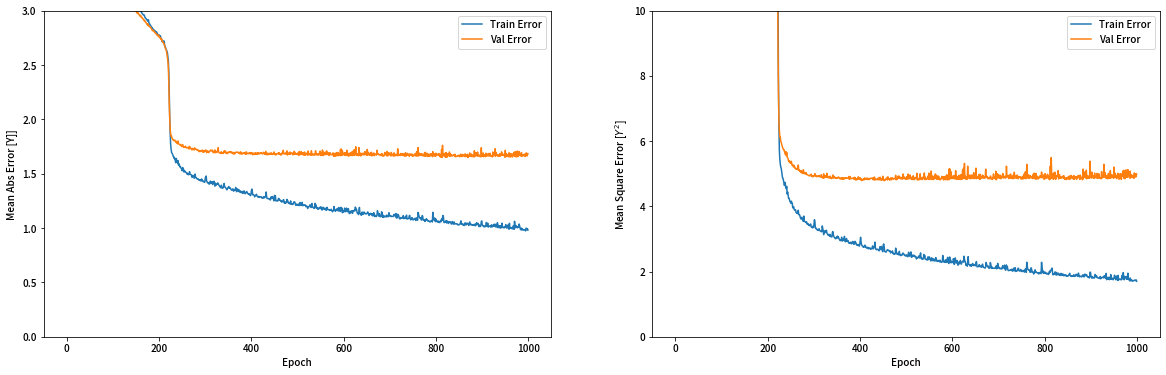

In [274]:
plot_history(history, [0, 3], [0, 10])

### Make predictions

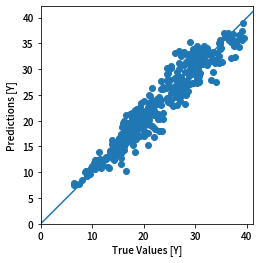

In [275]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Y]')
plt.ylabel('Predictions [Y]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


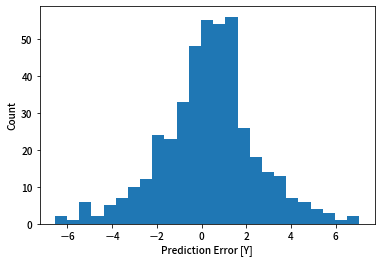

In [276]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Y]")
_ = plt.ylabel("Count")

#### 3일 예측해서 Y18과 비교해보기

In [277]:
test = df[x_col][n:n+n//10]
test_predictions = model.predict(normed_test_3).flatten()

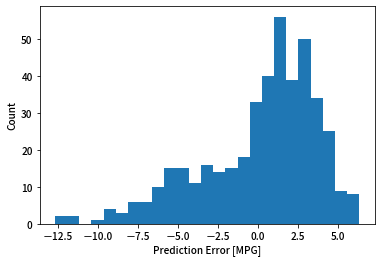

In [278]:
error = test_predictions-df['Y18'][n:n+n//10]
error.mean()
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [279]:
error[abs(error)>7]

4532    -8.737139
4533    -7.476727
4536    -7.716461
4676    -8.957712
4677   -12.018364
4678   -11.520046
4679   -12.672098
4680    -8.042046
4681    -8.137379
4683    -7.537781
4698    -7.081276
4700    -7.769030
4702    -8.032934
4704    -9.670044
4705   -11.233843
4706    -9.306700
4709    -8.167097
4710    -7.285933
4714    -9.576897
4715    -8.999956
4716    -7.104757
4717    -7.124186
Name: Y18, dtype: float64

#### 80일 예측 

In [280]:
test_predictions = model.predict(normed_test_80)

In [0]:
# 제출 파일 만들기
submit = pd.DataFrame({'id':range(144*33, 144*113),
              'Y18':test_predictions.reshape(1,-1)[0]})

In [0]:
submit.to_csv('./results/baseline_result'+now+'.csv', index = False)

## model2

#### Build the model

In [0]:
def build_model2():
    model = keras.Sequential([
            layers.Dense(1, activation='linear', input_shape=[1]),
            #layers.Dense(2, activation='relu'),
            #layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.005)
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [289]:
model2 = build_model2()

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0


#### Inspect the model

In [290]:
model2.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [291]:
example_batch = test_predictions[:10]
example_result = model2.predict(example_batch)
example_result

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_distributed_function_3026527 in device /job:localhost/replica:0/task:0/device:GPU:0


array([[6.522414 ],
       [6.4102244],
       [6.18694  ],
       [6.4617434],
       [6.1605644],
       [5.7492304],
       [6.218312 ],
       [6.2718678],
       [6.0194254],
       [5.7987905]], dtype=float32)

#### Train the model

In [292]:
EPOCHS = 100
## model1를 이용해 Yi를 예측한 결과를 train data로 이용
## Y18을 test data로 함
tmp_features =  model.predict(df[x_col][n:n+n//10])
tmp_labels = np.array(df['Y18'][n:n+n//10])

history = model2.fit(
  tmp_features, tmp_labels,
  epochs=EPOCHS, validation_split = 0.1, verbose=0,
  callbacks=[PrintDot()])

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandle

In [293]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist[::5]

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,51.634824,5.702112,51.634823,32.367986,5.126431,32.367985,0
5,13.760047,3.034199,13.760046,7.872715,1.908266,7.872715,5
10,13.640579,3.113108,13.640581,11.659881,2.556594,11.659882,10
15,13.676591,3.167153,13.676590,10.096580,2.301336,10.096580,15
20,13.660317,3.109551,13.660317,12.156977,2.645549,12.156977,20
25,13.425831,3.132507,13.425832,12.253627,2.664872,12.253628,25
30,13.507768,3.088011,13.507767,9.505672,2.210525,9.505672,30
35,13.411628,3.034391,13.411629,7.588449,1.872215,7.588448,35
40,13.386427,3.045550,13.386427,8.745630,2.085466,8.745630,40
45,13.301587,3.012035,13.301588,8.848106,2.106238,8.848105,45


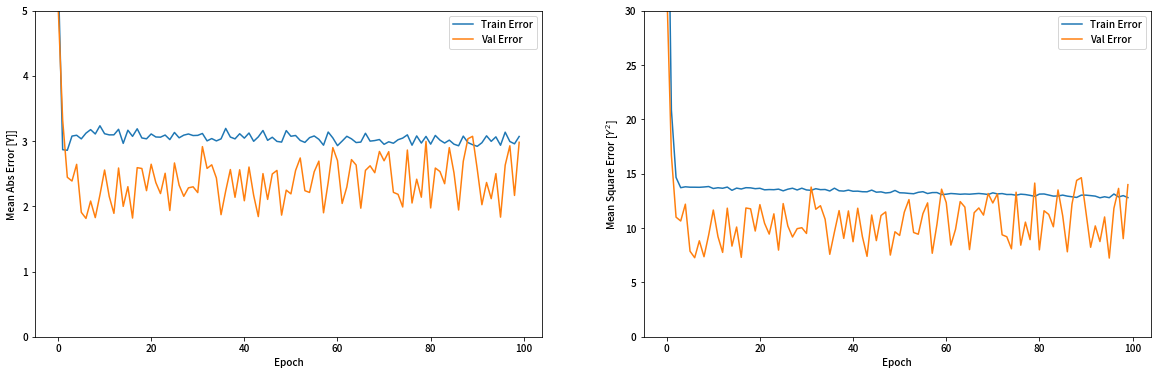

In [295]:
plot_history(history, ylim_mae=(0, 5), ylim_mse=(0, 30))

### Make predictions

#### 80일 예측 

In [296]:
test_predictions1 = model.predict(normed_test_80)
test_predictions2 = model2.predict(test_predictions1)

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_distributed_function_3035082 in device /job:localhost/replica:0/task:0/device:GPU:0


In [0]:
# 제출 파일 만들기
submit = pd.DataFrame({'id':range(144*33, 144*113),
              'Y18':test_predictions2.reshape(1,-1)[0]})

In [0]:
submit.to_csv('./results/baseline_result_2_'+now+'.csv', index = False)

In [299]:
test_predictions1 = model.predict(normed_test_80)
test_predictions2 = model2.predict(test_predictions1)

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0


In [0]:
# 제출 파일 만들기
submit = pd.DataFrame({'id':range(144*33, 144*113),
              'Y18':test_predictions2.reshape(1,-1)[0]})

In [0]:
submit.to_csv('./results/baseline_result_2_'+now+'.csv', index = False)